# 選挙のデータ解析（世論調査と寄付）

このレクチャーでは、2012年のアメリカ大統領選挙について扱います。その内容にあまり詳しくない方は、以下が参考になると思います。
https://ja.wikipedia.org/wiki/2012%E5%B9%B4%E3%82%A2%E3%83%A1%E3%83%AA%E3%82%AB%E5%90%88%E8%A1%86%E5%9B%BD%E5%A4%A7%E7%B5%B1%E9%A0%98%E9%81%B8%E6%8C%99

基本的には民主党のオバマ候補と、共和党のロムニー候補の争いで、オバマ候補が勝利しました。

最初は、世論調査結果のデータを扱います。以下のような問題を設定してみましょう。

    1.) どのような人達が調査対象だったか？
    2.) 調査結果は、どちらの候補の有利を示しているか？
    3.) 態度未定の人達が世論調査に与えた影響は？
    4.) また、態度未定の人たちの動向は？
    5.) 投票者の気持ちは、時間ともにどう変化したか？
    6.) 討論会の影響を世論調査の結果から読み取ることができるか？
    
2つ目のデータセットについては、後半で。

まずはいつものように、必要なものをインポートします

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Python2をお使いの場合は
#from __future__ import division

データは、HuffPost Pollsterから持ってきます。[サイトはこちら](http://elections.huffingtonpost.com/pollster). 米国の選挙のデータですが、このコースが終わったあとに、このサイトの別のデータを解析するのにチャレンジしてみるのもよいかもしれません。

Webからデータととってくるのに便利な、requestsというモジュールを使います。インストールされていない場合は、[こちらを参照](http://docs.python-requests.org/en/latest/)してください。

CSV形式のテキストデータをファイルのように扱うために、StringIOを利用します。[StringIOの詳しい解説（英語）](http://pymotw.com/2/StringIO/) 

In [3]:
# Webからデータを取得するために、requestsをインポートします。
import requests

# CSVデータのために、StringIOをつかいます。
from io import StringIO
# Python2を使っているときは,以下のコードでimportします。
# from StringIO import StringIO

In [4]:
# !!!!!!!
# このコードでプログラムから直接データをダウンロードできたのですが、2021/7現在、プログラムからの接続が禁止されてしまった模様です。
# このURLを使って、Webブラウザから手動でデータをダウンロードし、ファイルをJupyterを起動したディレクトリに保存してください。
# このセルのコードは実行せず、次のセルも参照してください。
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# requestsをつかってデータをtextとして取得します。
source = requests.get(url).text

# StringIOを使ってpandasのエラーを防ぎます。
poll_data = StringIO(source) 

早速、DataFrameにしましょう。

In [5]:
# こちらではなく、ファイルから直接読み込みます。
# poll_df = pd.read_csv(poll_data)
# 以下のコードでpll_dfをつくります。
poll_df = pd.read_csv('2012-general-election-romney-vs-obama.csv')

# データの概要です。
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

最初の5行を表示します。

In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


支持政党で分類します。アメリカは2大政党制で、大きく共和党（the Republican party)と民主党（the Democratic party）に分けられます。

In [8]:
# ちょっと分かりにくいので、世論調査の主体とその支持政党をまとめて見ます。
#poll_df[['Pollster','Partisan','Affiliation']].sort('Pollster').drop_duplicates()
#@ sortメソッドはなくなりました。
poll_df[['Pollster','Partisan','Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
...,...,...,...
105,United Technologies/National Journal,Nonpartisan,None
62,Washington Times/JZ Analytics,Nonpartisan,None
18,YouGov,Nonpartisan,None
533,YouGov/Economist,Nonpartisan,None


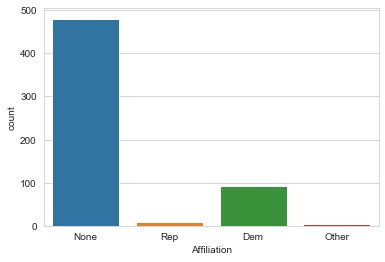

In [9]:
# affiliationで数を分類します。
sns.countplot('Affiliation',data=poll_df)

概ね中立のように見えますが、民主党寄りの調査主体が多いようにも見えます。このことは、頭に入れておいてもいいかもしれません。調査対象の人々の属性で層別化してみましょう。

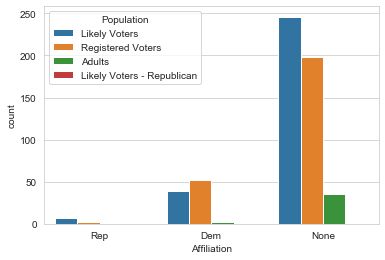

In [10]:
# 調査主体の支持政党を、調査対象で層別化します。
sns.countplot('Affiliation',data=poll_df,hue='Population', order=['Rep','Dem','None'])

概ね、選挙の投票に関連のある人々を対象にしているようですので、調査結果は信頼できそうです。
別の角度から解析を進めてみましょう。

In [11]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


オバマ、ロムニー、未定の3つの選択肢について、それぞれ平均的な支持率を計算してみます。

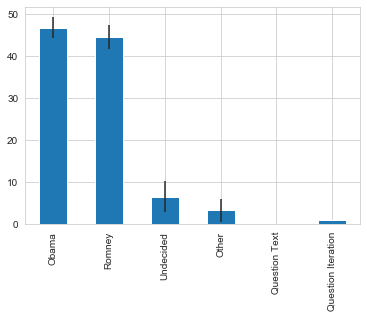

In [12]:
# 平均をとると、数値の列だけが残るので、いらないNumber of Observationsを削除します。
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

# 同じように、標準偏差を計算します。
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

# pandas標準のplotで描画します。エラーバーも付けておきましょう。
avg.plot(yerr=std,kind='bar',legend=False)

未定の動向に注目しつつ、もう少し詳しく見ていくことにしましょう。

In [13]:
# 平均と標準偏差のDataFrameを連結します。
poll_avg = pd.concat([avg,std],axis=1)

# 名前を変えておきます。
poll_avg.columns = ['Average','STD']

poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


<hr>

非常に接戦の選挙戦に見えます。ただ、未定の人達は、いざ投票が始まれば、どちらかに投票することになるので、その動向が注目されます。ここはひとまず、未定の人達が、半分ずつ、両候補へ分かれると仮定して、選挙戦の最終的な結果を推定してみましょう。

In [14]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


両候補の支持率と未定の割合を、手っ取り早くプロットしてみます。

Note: 時間が逆順になっているのに注意してください。また同じEnd Dateに複数のプロトがある場合があります。

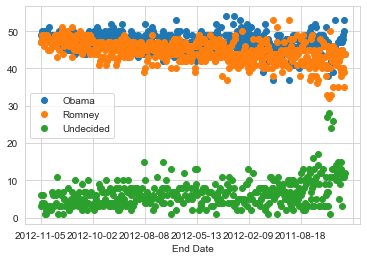

In [15]:
# 時間事に、支持率をプロットします。
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

ちょっと見にくいので、両陣営の支持率の差を可視化するには、新しいデータを作って解析した方が良さそうです。

これは、前に株価のデータを解析したときのように、時系列のデータとして解析するのがよさそうです。
時間とともに変化する支持率を、datetimeモジュールを使って、時系列のデータとして扱ってみましょう。

In [16]:
from datetime import datetime

オバマとロムニーの支持率の差を計算し、新しい列に保存します。

In [17]:
# Differenceは「差」を意味する英単語です。
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Difference列は、「Obama - Romney」です。正の数は、オバマのリードを意味します。

これを使って、支持率の差が時間とともに、どう変化したかを計算します。同じ期間に行われた調査もあるので、groupbyを使って、データを整理しましょう。

In [18]:
# as_index=Flaseにすると、0,1,2,... のindexを維持します。
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


時間とともに、支持率がどう変化したかを端的に可視化出来ます。

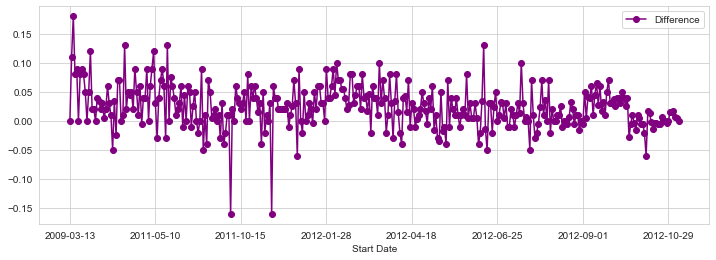

In [19]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

候補者同士の討論会があった日付を、このプロットに描き込むと面白いかも知れません。

2012の討論会があったのは、10/3、10/11、10/22です。これらを描き込んでみましょう。

2012年の10月が、X軸上のいくつ目のデータなのかを知る必要があります。
ここは単純に、2012/10のデータを見て、どのindexをとればいいか確認することにしましょう。

In [20]:
poll_df[poll_df['Start Date'].apply(lambda x:x.startswith('2012-10'))]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000


3日はデータが無いので、2日にします。ですので、330、337、347です。

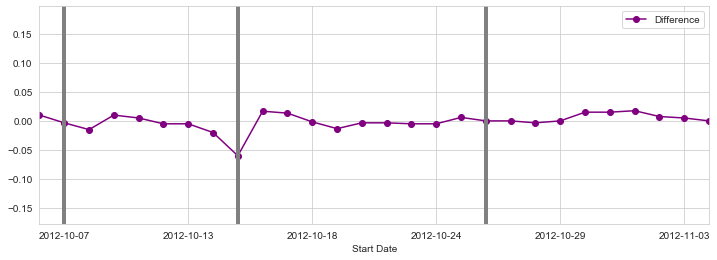

In [21]:
# まずは10月に限定したプロットです。
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))

# 討論会の日程を描き込みます。
plt.axvline(x=330, linewidth=4, color='grey')
plt.axvline(x=337, linewidth=4, color='grey')
plt.axvline(x=347, linewidth=4, color='grey')

米国大統領選挙に馴染みが薄いので、データの解釈は難しいですが、このような解析が役に立つのはおわかりいただけるかと思います。

こうしたデータを解釈する際は、様々な要因に注意を払う必要もあります。例えば、これらの世論調査が全米のどの場所で行われたかなども、世論調査の結果に大きく影響します。

<hr>

# 寄付のデータ

話題を変えて、両陣営への寄付に関するデータを分析していくことにします。

これまでで一番大きなデータセット（約150MB)になります。[ここからダウンロード出来ます](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0) , Notebookが起動しているフォルダと同じ場所に保存しておきましょう。

このデータは、次の視点から分析を進めることにします。

    1.) 寄付の金額とその平均的な額
    2.) 候補者ごとの寄付の違い
    3.) 民主党と共和党での寄付の違い
    4.) 寄付した人々の属性について
    5.) 寄付の総額になんらかのパターンがあるか？
    

In [22]:
# CSV形式のデータを読み込んで、DataFrameを作ります。
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/tsuji/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# データの概要です。
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [24]:
# 最初の5行を見てみます。
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


まずは、寄付の総額と平均的な額を計算してみることにしましょう。

In [25]:
# 寄付の額をざっと眺めてみます。
donor_df['contb_receipt_amt'].value_counts()
#donor_df['contb_receipt_amt'].value_counts().shape

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

8079種類もあるのにはちょっと驚きです。代表値を計算してみましょう。

In [26]:
# 寄付の平均的な額
don_mean = donor_df['contb_receipt_amt'].mean()

# 標準偏差
don_std = donor_df['contb_receipt_amt'].std()

print('寄付の平均は{:0.2f}ドルで、その標準偏差は{:0.2f}です。'.format(don_mean,don_std))

寄付の平均は298.24ドルで、その標準偏差は3749.67です。


ものすごく大きな標準偏差です。
非常に大きな値があるのでしょうか？分布の形がかなり偏っていることが予想されます。

In [28]:
# DataFrameの1列から、Seriesを作ります。
top_donor = donor_df['contb_receipt_amt'].copy()

# ソートしましょう。
#top_donor.sort()
top_donor.sort_values()

top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 1001731, dtype: float64

負の数や、非常に大きな値が見えます。
負の数は、払い戻しのデータなどですので、ひとまず正の数だけに注目することにしましょう。

In [29]:
# 負の数を取り除きます。
top_donor = top_donor[top_donor >0]

# ソートします
#top_donor.sort()
top_donor.sort_values()

# よく寄付される額Top10をみてみましょう。
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Top10でも、10ドルから2,500ドルまで幅広いことがわかります。

寄付の額は、10や50などキリの良い数字が多いのかどう書きになります。
ヒストグラムを描いて、2,500ドルまでのデータを調べてみましょう。

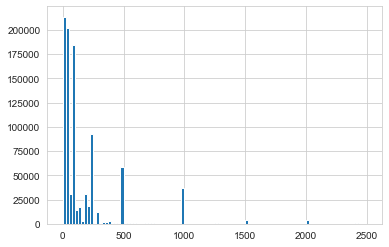

In [30]:
# 2,500ドルまでの寄付のデータを取り出します。
com_don = top_donor[top_donor < 2500]

# binを細かくして、キリのいい数字にピークがあるか、見てみましょう。
com_don.hist(bins=100)

どうやら、我々の直感は正しかったようです。

<hr>

政党ごとに寄付の額をまとめて見ることにします。
これをするには、まず候補者のデータに注目して、候補者の所属政党でデータを分類する事を試みます。

In [31]:
# 重複の無い候補者のデータを作って置きます。
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

新たに、Party列を作ります。候補者の所属政党のデータを保持する辞書を作って、一気にDataFrameを更新しましょう。 (詳しくはLecture 36にあります）

In [32]:
# 所属政党の辞書です。
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# 以下のコードで、DataFrame全体を更新できます。
donor_df['Party'] = donor_df.cand_nm.map(party_map)

もちろん、for文を使って同じ操作をすることが可能ですが、mapを使う方が早く終わります。

In [33]:
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

払い戻しのデータを除去しておきましょう。完成したデータは次のような感じです。

In [34]:
# 払い戻しの除去
donor_df = donor_df[donor_df.contb_receipt_amt >0]

donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


候補者ごとに寄付の額をまとめてみます。
まずはじめに、寄付の件数から。

In [35]:
# 候補者の名前でグループ化したあと、それぞれの寄付件数を表示します。
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

オバマの圧勝です。それもそのはず。彼は民主党からの唯一の候補者なので、寄付が集まっているわけです。寄付の額を見てみましょう。

In [36]:
# グループ化したあと、今度は寄付の総額を表示します。
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

ちょっと読みにくいので、少し結果を整形することにします。

In [37]:
# データの準備です。
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# indexアクセスのための変数を用意します。
i = 0

for don in cand_amount:
    print("{}は、{:.0f}ドル集めました。\n".format(cand_amount.index[i],don))
    i += 1

Bachmann, Michelleは、2711439ドル集めました。

Cain, Hermanは、7101082ドル集めました。

Gingrich, Newtは、12832770ドル集めました。

Huntsman, Jonは、3330373ドル集めました。

Johnson, Gary Earlは、566962ドル集めました。

McCotter, Thaddeus Gは、39030ドル集めました。

Obama, Barackは、135877427ドル集めました。

Paul, Ronは、21009620ドル集めました。

Pawlenty, Timothyは、6004819ドル集めました。

Perry, Rickは、20305754ドル集めました。

Roemer, Charles E. 'Buddy' IIIは、373010ドル集めました。

Romney, Mittは、88335908ドル集めました。

Santorum, Rickは、11043159ドル集めました。



文字での表示より、やはりグラフ表示がいいかもしれません。

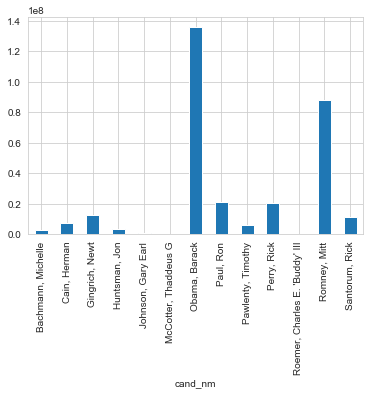

In [38]:
# 棒グラフを描いてみましょう。
cand_amount.plot(kind='bar')

比較が簡単になりました。
オバマ候補だけで100億円以上のお金が寄付で集まっているのがわかります。
今度は、政党別で比較してみましょう。

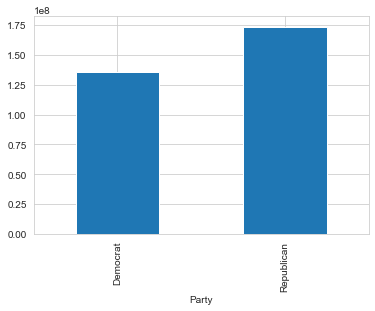

In [39]:
# 政党ごとの寄付の額です。
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

民主党（Democrat）はオバマ候補1人ですので、政党の比較では、共和党優勢ですが、共和党候補者達は、この額をみんなで分けているので、個人でみると厳しい情勢です。

最後に、寄付した人達の職業をまとめてみましょう。
まず、職業のデータを元のDataFrameから抜き出して、これをもとに、ピボットテーブルを作ります。このとき、職業ごとに民主党と共和党への寄付額が分かるようにします。
最後にこれらのデータをまとめて、寄付者の属性ごとの寄付額を算出してみましょう。

In [40]:
# 職業ごとに、政党別に分けて寄付額をまとめます。
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [41]:
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


DataFrameのサイズを見ておきましょう。

In [42]:
occupation_df.shape

(45067, 2)

4万5千以上の職種があるようで、簡単には描画できそうにありません。
閾値を決めて、寄付の総額が小さい職種については、表示を省略するようにしてみます。

In [43]:
# 百万ドル（約1億2千万）をひとつの区切りにしてみます。
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [44]:
# サイズを見てみましょう。
occupation_df.shape

(31, 2)

これなら、グラフにできそうです。

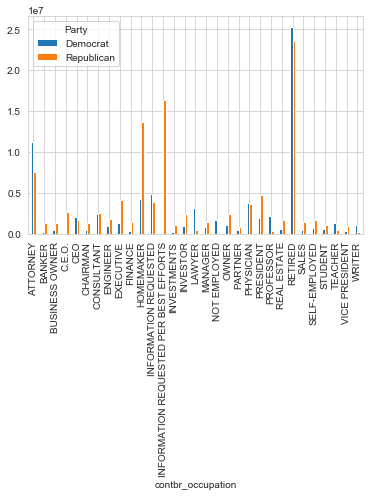

In [45]:
# pandasの機能を使って、棒グラフを描いてみます。
occupation_df.plot(kind='bar')

kind = 'barh' (horizontal)とすると、横向きになります。

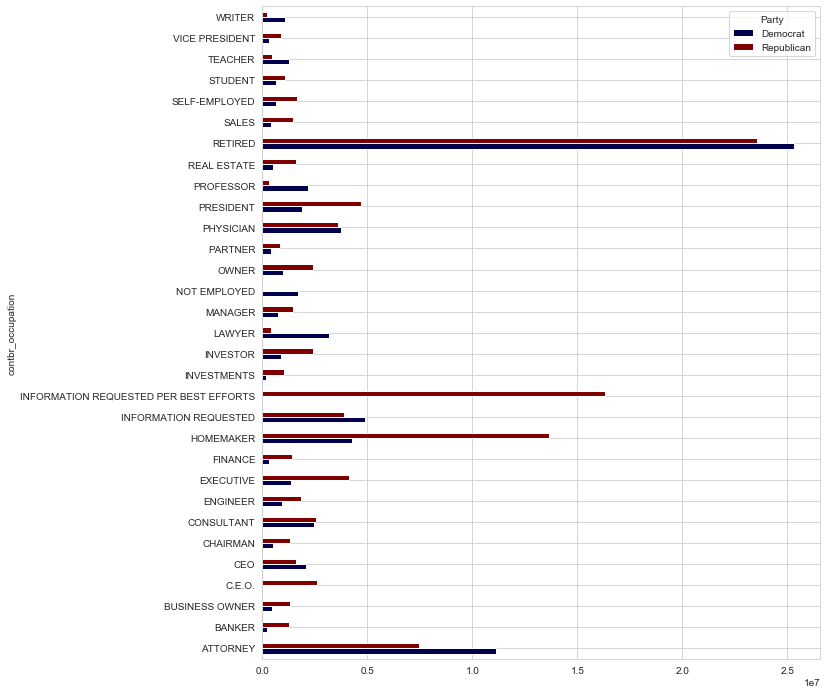

In [46]:
# 横向き（水平：Horizontal）な図が描けました。
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [47]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


色々と粗が目立ちます。ひとまず、「Information Requested」を取り除いて、「CEO」と「C.E.O.」を1つにまとめてみます。

In [48]:
# 無効な回答を取り除きます。
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

CEOとC.E.Oをまとめましょう。

In [49]:
# CEOにまとめます。
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# C.E.O.を消しましょう。
occupation_df.drop('C.E.O.',inplace=True)

再び、プロットします。

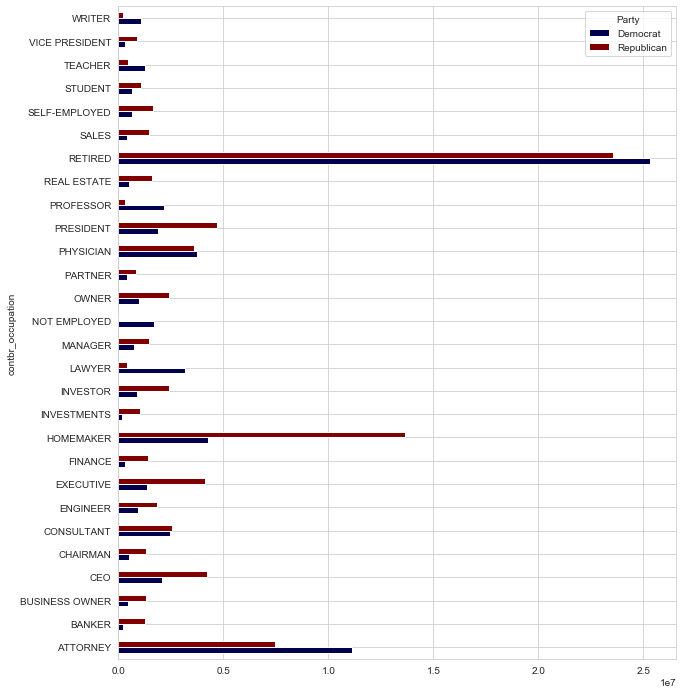

In [50]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

CEO（企業経営者）は、保守的な思想の持ち主のように見えます。両党の税に対する考え方が反映されているのかも知れません。

### お疲れ様でした
選挙に関するデータを一通り解析しました。大きなデータセットなので、工夫次第でまだまだやれることがあると思いますので、是非チャレンジしてみてください。

日本でも、選挙に関するデータ解析の事例があります。是非、参考にしてみてください。
http://event.yahoo.co.jp/bigdata/senkyo201307/